# Import Libraries

In [69]:
!pip install tensorflow

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd


# Split

In [71]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Plot

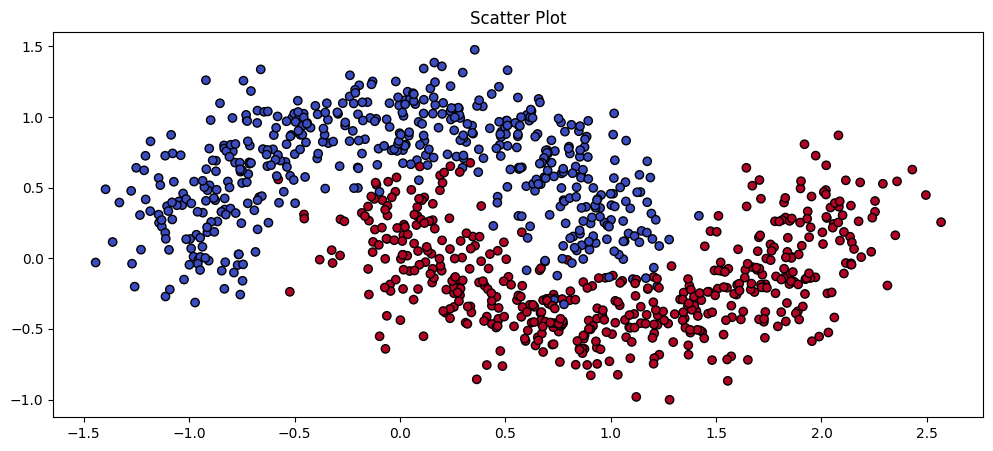

In [72]:
# Plot the noisy data
plt.figure(figsize=(12, 5))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title(f'Scatter Plot')
plt.show()

# Logistic Regression

In [73]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

# Predict

In [74]:
y_pred= lg.predict(X_test)

# Evaluate

In [75]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8467
Precision: 0.8581
Recall: 0.8471
F1 Score: 0.8526
Confusion Matrix:
[[121  22]
 [ 24 133]]


In [76]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       143
           1       0.86      0.85      0.85       157

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Plot

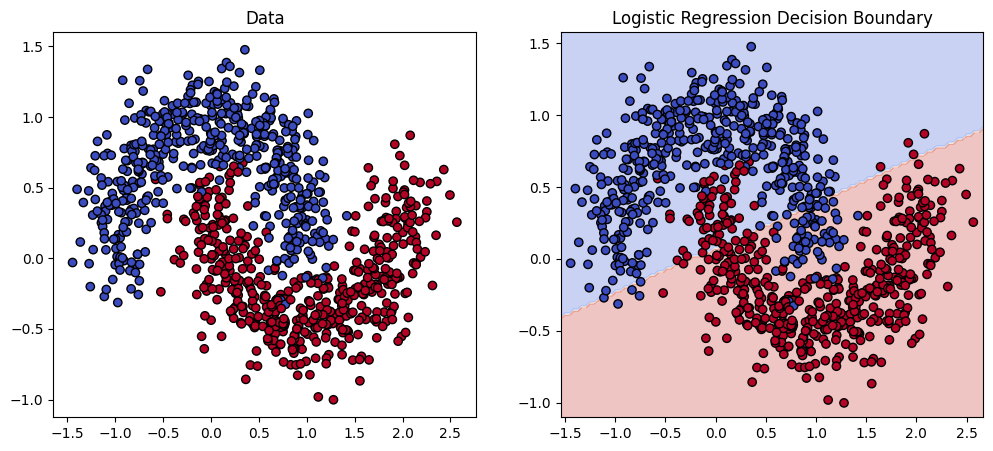

In [77]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for Logistic Regression
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))
Z = lg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()


# Build Neural Network

In [78]:
X_train.shape[1]

2

In [ ]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10501 (41.02 KB)
Trainable params: 10501 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
18/18 [==============================] - 1s 12ms/step - loss: 0.4312 - accuracy: 0.8500 - val_loss: 0.3774 - val_accuracy: 0.8071
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2841 - accuracy: 0.8679 - val_loss: 0.3636 - val_accuracy: 0.8286
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.8786 - val_loss: 0.3488 - val_accuracy: 0.8571
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2606 - accuracy: 0.8804 - val_loss: 0.3427 - val_accuracy: 0.8571
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.8804 - val_loss: 0.3364 - val_accuracy: 0.8643
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.8732 - val_loss: 0.3413 - val_accuracy: 0.8571
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8786 - val_loss: 0.3419 - val_accuracy: 0.8571
Epoch 8/20
18/18 [=

# Plot

In [82]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

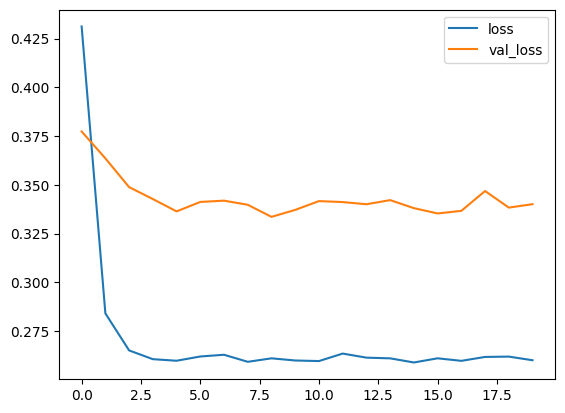

In [83]:
metrics[['loss','val_loss']].plot()

<Axes: >

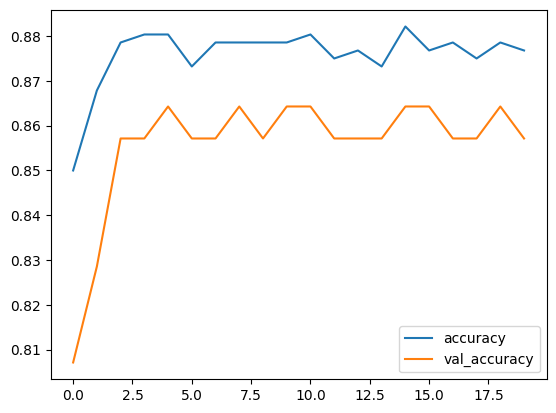

In [84]:
metrics[['accuracy', 'val_accuracy']].plot()

# Predict

In [85]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


10/10 [==============================] - 0s 1ms/step


In [86]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8533
Precision: 0.8693
Recall: 0.8471
F1 Score: 0.8581
Confusion Matrix:
[[123  20]
 [ 24 133]]


In [87]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       143
           1       0.87      0.85      0.86       157

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Plot

313/313 [==============================] - 1s 2ms/step


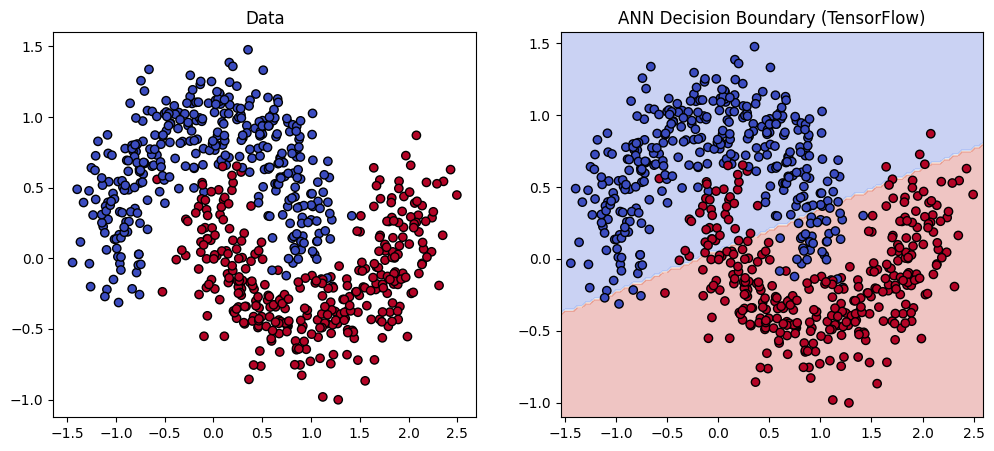

In [88]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1, 100),
                     np.linspace(X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()


# Test

313/313 [==============================] - 0s 1ms/step


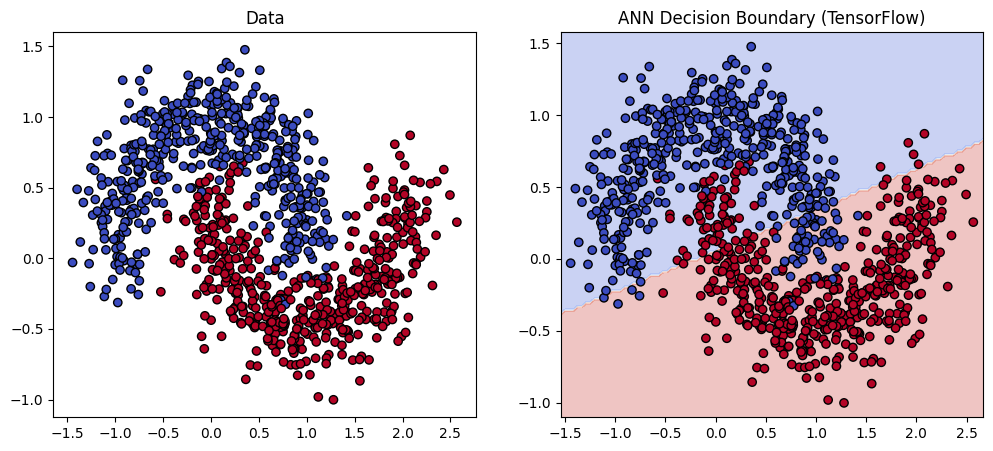

In [89]:
plt.figure(figsize=(12, 5))

# Plot data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Data')

# Plot decision boundary for ANN
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                     np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype("int32").reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('ANN Decision Boundary (TensorFlow)')
plt.show()
